In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from matplotlib.colors import LogNorm

In [2]:
# Caminho do arquivo CSV
csv_path = "scan_000043A_Quad_130_MGT_X0Y14_TX-_Quad_130_MGT_X0Y14_RX.csv"

In [3]:
# Detecta automaticamente a linha "Scan Start" para pular o cabeçalho
def find_data_start(filename, marker="2d statistical"):
    with open(filename, "r") as f:
        for i, line in enumerate(f):
            if marker in line:
                return i + 1  # dados começam na linha seguinte


In [4]:
# Encontra a linha onde os dados do scan começam
with open(csv_path, "r") as f:
    lines = f.readlines()
    for i, line in enumerate(lines):
        if line.strip().startswith("2d statistical"):
            scan_header_idx = i
            break

In [5]:
# Lê os dados do Eye Scan a partir da linha de cabeçalho "2d statistical"
df_diagram = pd.read_csv(csv_path, skiprows=scan_header_idx + 1, header=None)

# A linha "2d statistical" contém os nomes das colunas — precisamos extrair os Xs
x_vals = np.array(lines[scan_header_idx].strip().split(",")[1:]).astype(float)

# Remove a linha final "Scan End", se estiver presente
df_diagram = df_diagram[~df_diagram.iloc[:, 0].astype(str).str.contains("Scan End")]

In [6]:
# Extrai os valores de Y (primeira coluna) e Z (valores de BER)
y_vals = df_diagram.iloc[:, 0].astype(float).values
z_vals = df_diagram.iloc[:, 1:].astype(float).values

# Cria a malha
X, Y = np.meshgrid(x_vals, y_vals)

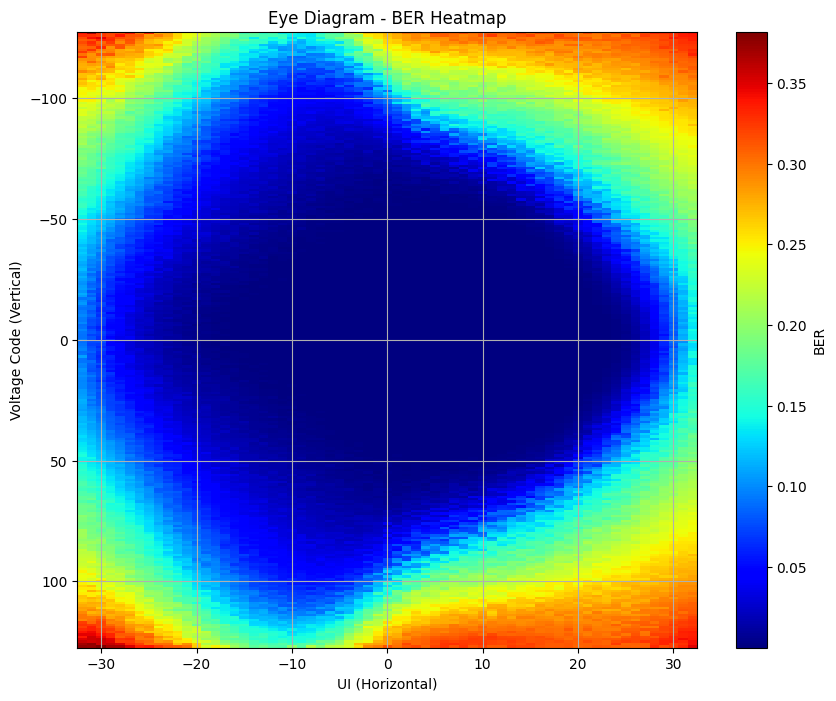

In [7]:
# Plota
plt.figure(figsize=(10, 8))\

# Ajuste os limites da barra de cores aqui
vmin = 1.9e-7   # BER mínimo mostrado na barra
vmax = 2.9e-1   # BER máximo mostrado na barra

plt.pcolormesh(X, Y, z_vals, shading='auto', cmap='jet')
plt.colorbar(label='BER')
plt.title("Eye Diagram - BER Heatmap")
plt.xlabel("UI (Horizontal)")
plt.ylabel("Voltage Code (Vertical)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

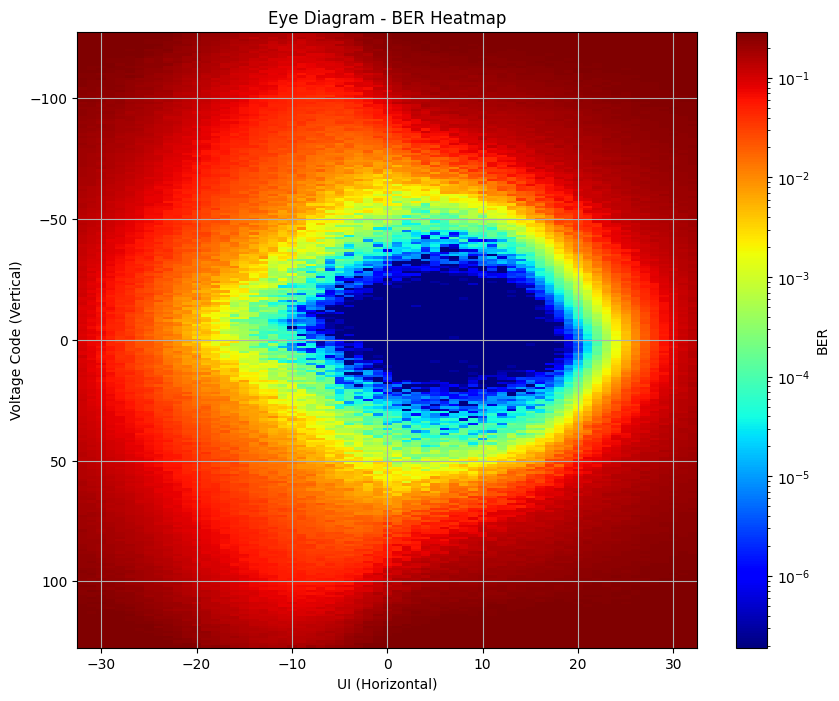

In [13]:
# Plota
plt.figure(figsize=(10, 8))\

# Ajuste os limites da barra de cores aqui
vmin = 1.9e-7   # BER mínimo mostrado na barra
vmax = 2.9e-1   # BER máximo mostrado na barra

vmin = np.percentile(z_vals, 5)   # 5º percentil
vmax = np.percentile(z_vals, 95)  # 95º percentil

plt.pcolormesh(X, Y, z_vals, shading='auto', cmap='jet', norm=LogNorm(vmin=vmin, vmax=vmax))
plt.colorbar(label='BER')
plt.title("Eye Diagram - BER Heatmap")
plt.xlabel("UI (Horizontal)")
plt.ylabel("Voltage Code (Vertical)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()

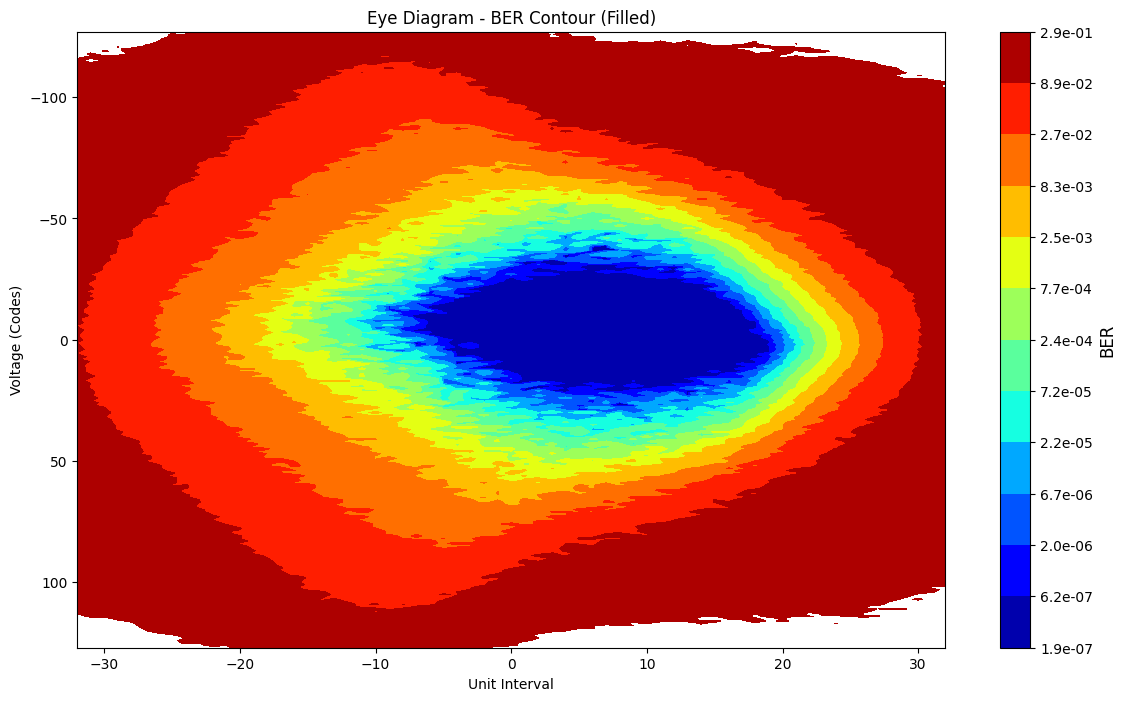

In [35]:

# === 3. Gera o gráfico com contorno preenchido (filled contour) ===
plt.figure(figsize=(14, 8))

# Ajuste os limites da barra de cores aqui
vmin = np.percentile(z_vals, 5)   # 5º percentil
vmax = np.percentile(z_vals, 95)  # 95º percentil

# Define níveis log-spaced (opcional: ajuste para mais suavidade)
levels = np.logspace(np.log10(vmin), np.log10(vmax), num=13)
#levels = np.logspace(-7, -1, num=13)  # 12 intervalos entre 1e-7 e 1e-1

contour = plt.contourf(X, Y, z_vals, levels=levels, cmap="jet", norm=LogNorm(vmin=vmin, vmax=vmax))

# Barra lateral
cbar = plt.colorbar(contour, format="%.1e", ticks=levels)
cbar.ax.set_yticklabels(["{:.1e}".format(lvl) for lvl in levels])
cbar.set_label("BER", fontsize=12)

# Eixos
plt.xlabel("Unit Interval")
plt.ylabel("Voltage (Codes)")
plt.title("Eye Diagram - BER Contour (Filled)")
plt.gca().invert_yaxis()
#plt.grid(True)


In [26]:
levels

array([1.90738000e-07, 6.95808903e-07, 2.53829876e-06, 9.25966969e-06,
       3.37791138e-05, 1.23225619e-04, 4.49524912e-04, 1.63985905e-03,
       5.98217727e-03, 2.18228785e-02, 7.96094809e-02, 2.90414000e-01])